In [1]:
from langchain_groq import ChatGroq


llm = ChatGroq(
    model_name="deepseek-r1-distill-llama-70b",
    temperature=0
)


response=llm.invoke("what is length of wall of china?")

print(response)


content="<think>\nOkay, so I need to figure out the length of the Great Wall of China. I remember hearing that it's really long, but I'm not exactly sure how long. I think it's somewhere in the thousands of miles, but I'm not certain. Let me try to break this down.\n\nFirst, I know the Great Wall is a series of fortifications built across several Chinese dynasties. It wasn't built all at once, so maybe that's why the length can vary. I've heard different numbers before, like 13,000 miles or 21,000 kilometers. But I'm not sure which one is accurate.\n\nI should consider the sources of this information. Maybe some people measure it differently. For example, if you include all the branches and sections, it might add up to a longer distance. But if you just take the main wall, it might be shorter. I think the Chinese government did a survey a while back, so that might be a reliable source.\n\nWait, I think they used advanced technology like GPS and satellites to measure it more accurately.

In [2]:
import os
from dotenv import load_dotenv

load_dotenv()

os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")
os.environ["OPENWEATHER_API_KEY"]=os.getenv("OPENWEATHER_API_KEY")

In [3]:
# add tools for travel assitent


from langchain.tools import tool
from langchain_community.tools.tavily_search import TavilySearchResults
@tool
def search_for_attraction(city: str) :
    """
    This method return attracation,restaurant,activities and transportation of city .

    Args:
        city (str): city.

    Returns:
        str: return attracation,restaurant,activities and transportation of city
    """
    # Tavily tool to search the web
    search = TavilySearchResults()
    # Questions to search
    queries = {
        "Attractions": f"Top tourist attractions in {city}",
        "Restaurants": f"Famous restaurants in {city}",
        "Activities": f"Popular activities to do in {city}",
        "Transportation": f"Transportation options in {city} for tourists"
    }
    # Get and print results
    results = {}
    for category, query in queries.items():
        print(f"\n🔍 Searching for {category} in {city}...")
        search_result = search.run(query)
        results[category] =  "\n".join([entry["content"] for entry in search_result])
        
    # # Display
    # for category, content in results.items():
    #     print(f"\n📌 {category}:\n{content}")
    
    print(results)
    
    return results
    

In [4]:
search_for_attraction.run("Singapore")


🔍 Searching for Attractions in Singapore...

🔍 Searching for Restaurants in Singapore...

🔍 Searching for Activities in Singapore...

🔍 Searching for Transportation in Singapore...
{'Attractions': '*   [(Top)](https://en.wikipedia.org/wiki/List_of_tourist_attractions_in_Singapore#)\n*   [1 Beaches and bays](https://en.wikipedia.org/wiki/List_of_tourist_attractions_in_Singapore#Beaches_and_bays)\n    \n*   [2 Cultural centres](https://en.wikipedia.org/wiki/List_of_tourist_attractions_in_Singapore#Cultural_centres)\n    \n*   [3 Educational centres](https://en.wikipedia.org/wiki/List_of_tourist_attractions_in_Singapore#Educational_centres) [...] 1.  **[^](https://en.wikipedia.org/wiki/List_of_tourist_attractions_in_Singapore#cite_ref-1 "Jump up")** [Royal Albatross Sunset Sail](https://www.tallship.com.sg/events/sunset-sail-city-lights/) [...] *   [Jurong Reptile Park](https://en.wikipedia.org/wiki/Jurong_Reptile_Park "Jurong Reptile Park")\n*   [Malay Village](https://en.wikipedia.org/

{'Attractions': '*   [(Top)](https://en.wikipedia.org/wiki/List_of_tourist_attractions_in_Singapore#)\n*   [1 Beaches and bays](https://en.wikipedia.org/wiki/List_of_tourist_attractions_in_Singapore#Beaches_and_bays)\n    \n*   [2 Cultural centres](https://en.wikipedia.org/wiki/List_of_tourist_attractions_in_Singapore#Cultural_centres)\n    \n*   [3 Educational centres](https://en.wikipedia.org/wiki/List_of_tourist_attractions_in_Singapore#Educational_centres) [...] 1.  **[^](https://en.wikipedia.org/wiki/List_of_tourist_attractions_in_Singapore#cite_ref-1 "Jump up")** [Royal Albatross Sunset Sail](https://www.tallship.com.sg/events/sunset-sail-city-lights/) [...] *   [Jurong Reptile Park](https://en.wikipedia.org/wiki/Jurong_Reptile_Park "Jurong Reptile Park")\n*   [Malay Village](https://en.wikipedia.org/wiki/Malay_Village "Malay Village")\n*   [Mandai Orchid Garden](https://en.wikipedia.org/wiki/Mandai_Orchid_Garden "Mandai Orchid Garden")\n*   [New World Amusement Park](https://en.

In [5]:
import requests

# Tool 1: Get current weather
@tool
def get_current_weather(location: str) -> str:
    """Fetches current weather for a given location using OpenWeatherMap API."""
    OPENWEATHER_API_KEY = os.environ["OPENWEATHER_API_KEY"]
    url = f"http://api.openweathermap.org/data/2.5/weather?q={location}&appid={OPENWEATHER_API_KEY}&units=metric"
    response = requests.get(url)
    if response.status_code != 200:
        return f"Error getting weather for {location}. Check location name."
    data = response.json()
    weather = data['weather'][0]['description']
    temp = data['main']['temp']
    return f"The current weather in {location} is {weather} with temperature {temp}°C."

# Tool 2: Get weather forecast
@tool
def get_weather_forecast(location: str) -> str:
    """Fetches 3-day weather forecast for a given location using OpenWeatherMap API."""
    OPENWEATHER_API_KEY = os.environ["OPENWEATHER_API_KEY"]
    url = f"http://api.openweathermap.org/data/2.5/forecast?q={location}&appid={OPENWEATHER_API_KEY}&units=metric"
    response = requests.get(url)
    if response.status_code != 200:
        return f"Error getting forecast for {location}. Check location name."
    data = response.json()
    forecast_text = f"3-Day Forecast for {location}:\n"
    # Get first 3 days (each day has multiple 3-hour forecasts)
    seen_days = set()
    for item in data['list']:
        date = item['dt_txt'].split(" ")[0]
        if date not in seen_days:
            weather = item['weather'][0]['description']
            temp = item['main']['temp']
            forecast_text += f"{date}: {weather}, {temp}°C\n"
            seen_days.add(date)
        if len(seen_days) >= 3:
            break
    return forecast_text.strip()

In [6]:

get_current_weather.invoke("Delhi")

'The current weather in Delhi is haze with temperature 31.05°C.'

In [7]:
get_weather_forecast.invoke("Delhi")

'3-Day Forecast for Delhi:\n2025-06-16: light rain, 30.74°C\n2025-06-17: light rain, 24.17°C\n2025-06-18: light rain, 35°C'

In [8]:
SERPAPI_KEY = os.getenv("SERPAPI_API_KEY")
from langchain.tools import tool

@tool
def search_hotels(city: str) -> list:
    """Search hotels in the given city using SerpAPI (Travel Results)."""
    url = "https://serpapi.com/search.json"
    params = {
        "engine": "google",
        "q": f"hotels in {city}",
        "type": "hotels",
        "api_key": SERPAPI_KEY
    }

    response = requests.get(url, params=params)

    results = response.json()
    print(results)
    hotels = []
    for item in results.get("shopping_results", []):
        hotels.append({
            "name": item.get("title"),
            "price": item.get("price"),
            "rating": item.get("rating"),
            "source": item.get("source"),
            "link": item.get("link")
        })
    return hotels


@tool
def estimate_average_cost(hotels: list) -> float:
    """Estimate the average hotel cost from a list of hotels using extracted_price if available."""
    prices = []

    for h in hotels:
        if "price" in h and isinstance(h["price"], (int, float)):
            prices.append(h["price"])
        elif "price" in h and isinstance(h["price"], str) and "$" in h["price"]:
            try:
                p = float(h["price"].replace("$", "").replace(",", ""))
                prices.append(p)
            except ValueError:
                continue

    if not prices:
        return 0.0

    return round(sum(prices) / len(prices), 2)


@tool
def get_budget_range(avg_cost: float) -> str:
    """Classify the average cost into budget range."""
    if avg_cost < 50:
        return "Low Budget"
    elif avg_cost < 150:
        return "Medium Budget"
    else:
        return "High Budget"

In [10]:
hotels = search_hotels.run("hyderabad")

estimate_price = estimate_average_cost.run({"hotels": hotels})

print(estimate_price)

budget_range = get_budget_range.run({"avg_cost": estimate_price})
print(budget_range)


{'search_metadata': {'id': '684fe14cf7ae8de206998887', 'status': 'Success', 'json_endpoint': 'https://serpapi.com/searches/cf658df2661d2a26/684fe14cf7ae8de206998887.json', 'created_at': '2025-06-16 09:18:04 UTC', 'processed_at': '2025-06-16 09:18:04 UTC', 'google_url': 'https://www.google.com/search?q=hotels+in+hyderabad&oq=hotels+in+hyderabad&sourceid=chrome&ie=UTF-8', 'raw_html_file': 'https://serpapi.com/searches/cf658df2661d2a26/684fe14cf7ae8de206998887.html', 'total_time_taken': 10.51}, 'search_parameters': {'engine': 'google', 'q': 'hotels in hyderabad', 'google_domain': 'google.com', 'device': 'desktop'}, 'search_information': {'query_displayed': 'hotels in hyderabad', 'total_results': 164000000, 'time_taken_displayed': 0.65, 'organic_results_state': 'Results for exact spelling'}, 'shopping_results': [{'position': 1, 'block_position': 'top', 'title': 'ibis Hyderabad HITEC City', 'price': '$56', 'extracted_price': 56, 'link': 'https://www.google.com/aclk?sa=l&ai=DChcSEwi6it-AzvWN

In [35]:


@tool
def calculate_hotel_cost(days: int, price_per_day: float) -> str:
    """
    Calculates the total cost of a hotel stay.

    Args:
        days (int): Number of days stayed.
        price_per_day (float): Price per day in currency units.

    Returns:
        str: A message indicating the total cost.
    """
    if days < 0 or price_per_day < 0:
        return "Invalid input: days and price must be non-negative."

    total = days * price_per_day
    return f"The total cost for {days} day(s) at ${price_per_day} per day is ${total} ."

In [36]:
output = calculate_hotel_cost.run({"days": 10, "price_per_day": 50.2})
print(output)

The total cost for 10 day(s) at $50.2 per day is $502.0 .


In [74]:
import yfinance as yf

@tool
def get_exchange_rate() -> float:
    """
    Gets the current USD to INR exchange rate using Yahoo Finance.
    Returns:
        float: The exchange rate from USD to INR.
    """
    ticker = yf.Ticker("USDINR=X")
    data = ticker.history(period="1d")
    
    if data.empty:
        raise ValueError("No data received from Yahoo Finance.")
    
    # Get the latest closing price
    rate = data["Close"].iloc[-1]
    return round(rate, 4)

@tool
def convert_currency(amount_in_usd: float) -> float:
    """
    Converts a given amount in USD to INR using the current exchange rate.

    Args:
        amount_in_usd (float): The amount in USD to be converted.

    Returns:
        float: The converted amount in INR.
    """
    rate = get_exchange_rate.invoke({})
    return round(amount_in_usd * rate, 2)

In [76]:
convert_currency.invoke({"amount_in_usd": 1000.00})

np.float64(86052.5)

In [77]:
tools=[convert_currency, calculate_hotel_cost, search_hotels, estimate_average_cost,get_budget_range,search_for_attraction,get_current_weather,get_weather_forecast]


In [78]:
llm_with_tools=llm.bind_tools(tools)


In [84]:
response=llm_with_tools.invoke("weather in pune")

In [85]:
response.tool_calls

[{'name': 'get_current_weather',
  'args': {'location': 'Pune'},
  'id': 'vvrmwxvyz',
  'type': 'tool_call'}]

In [87]:
SYSTEM_PROMPT = """
You are a smart and helpful travel assistant. Given a city name and the number of days of stay, assist the user with detailed travel planning by performing the following tasks step-by-step:

---

**Inputs**
- City: {{city_name}}
- Number of Days: {{number_of_days}}

---

**Step 1: Explore Local Options**
For the specified city, provide:
1. Top tourist attractions to visit.
2. Recommended restaurants with local or popular cuisine.
3. Culturally relevant or fun activities.
4. Local transportation options (e.g., metro, taxi, bike rentals, etc.).

---

**Step 2: Weather Forecast**
- Current weather conditions in the city.
- 5-day weather forecast (if the stay is longer than 1 day).

---

**Step 3: Hotel Estimation**
1. Find suitable hotels based on ratings and central location.
2. Estimate the average cost per night.
3. Classify the hotel as high-budget or low-budget based on pricing.

---

**Step 4: Calculate Trip Budget**
- Multiply the hotel cost per night by the number of stay days.
- Add estimated daily expenses for food, activities, and transportation.
- Return the total estimated budget in USD.

---

**Step 5: Currency Conversion**
- Convert the total USD budget to INR using the current exchange rate.

---

**Step 6: Final Summary**
Provide a comprehensive summary including:
- Attractions, restaurants, activities, and transport options.
- Weather overview during the stay.
- Hotel details and budget classification.
- Total estimated cost in both USD and INR.
- Additional travel tips based on local customs or seasonal factors.
"""

In [88]:
user_query=["tell me tour plan for singapore for 5 days of itenery in medium budget"]

In [89]:
[SYSTEM_PROMPT]+user_query

['\nYou are a smart and helpful travel assistant. Given a city name and the number of days of stay, assist the user with detailed travel planning by performing the following tasks step-by-step:\n\n---\n\n**Inputs**\n- City: {{city_name}}\n- Number of Days: {{number_of_days}}\n\n---\n\n**Step 1: Explore Local Options**\nFor the specified city, provide:\n1. Top tourist attractions to visit.\n2. Recommended restaurants with local or popular cuisine.\n3. Culturally relevant or fun activities.\n4. Local transportation options (e.g., metro, taxi, bike rentals, etc.).\n\n---\n\n**Step 2: Weather Forecast**\n- Current weather conditions in the city.\n- 5-day weather forecast (if the stay is longer than 1 day).\n\n---\n\n**Step 3: Hotel Estimation**\n1. Find suitable hotels based on ratings and central location.\n2. Estimate the average cost per night.\n3. Classify the hotel as high-budget or low-budget based on pricing.\n\n---\n\n**Step 4: Calculate Trip Budget**\n- Multiply the hotel cost per

In [92]:
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph,MessagesState,START,END
from langgraph.prebuilt import ToolNode

def function_1(state:MessagesState):
    
    user_question=state["messages"]
    
    input_question = [SYSTEM_PROMPT]+user_question
    
    response = llm_with_tools.invoke(input_question)
    
    return {
        "messages":[response]
    }

In [95]:
from langgraph.prebuilt import ToolNode

builder=StateGraph(MessagesState)
builder.add_node("llm_decision_step",function_1)
builder.add_node("tools",ToolNode(tools))

builder.add_edge(START,"llm_decision_step")

from langgraph.prebuilt import tools_condition
builder.add_conditional_edges(
    "llm_decision_step",
    tools_condition,
)

In [97]:
builder.add_edge("tools","llm_decision_step")

react_graph=builder.compile()



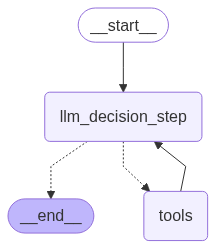

In [98]:
from IPython.display import Image, display
display(Image(react_graph.get_graph().draw_mermaid_png()))

In [115]:
message=[HumanMessage(content="tell me tour plan for singapore for 3 days of itenery in high budget")]


In [118]:
output = react_graph.invoke({"messages":message})
print(output)


{'messages': [HumanMessage(content='tell me tour plan for singapore for 3 days of itenery in high budget', additional_kwargs={}, response_metadata={}, id='33caca85-fbdd-4737-b823-ea5f36842328'), AIMessage(content="Here's a detailed 3-day high-budget tour plan for Singapore:\n\n---\n\n### **Day 1: Arrival & Exploring Iconic Landmarks**\n\n**Morning:**\n- **Arrival & Check-In:** Arrive in Singapore and check into a luxurious hotel like the Marina Bay Sands or Raffles Hotel Singapore.\n- **Breakfast:** Enjoy a gourmet breakfast at your hotel or head to a renowned café like Tiong Bahru Bakery.\n\n**Afternoon:**\n- **Visit Gardens by the Bay:** Explore the stunning Supertree Grove and the cooled conservatories, Cloud Forest and Flower Dome.\n- **Lunch:** Dine at Lau Pa Sat, a historic hawker center offering a variety of local delicacies.\n\n**Evening:**\n- **Marina Bay Sands SkyPark:** Take in breathtaking views of the city skyline from the observation deck.\n- **Dinner:** Experience fine d

In [119]:
print(output['messages'][1].content)

Here's a detailed 3-day high-budget tour plan for Singapore:

---

### **Day 1: Arrival & Exploring Iconic Landmarks**

**Morning:**
- **Arrival & Check-In:** Arrive in Singapore and check into a luxurious hotel like the Marina Bay Sands or Raffles Hotel Singapore.
- **Breakfast:** Enjoy a gourmet breakfast at your hotel or head to a renowned café like Tiong Bahru Bakery.

**Afternoon:**
- **Visit Gardens by the Bay:** Explore the stunning Supertree Grove and the cooled conservatories, Cloud Forest and Flower Dome.
- **Lunch:** Dine at Lau Pa Sat, a historic hawker center offering a variety of local delicacies.

**Evening:**
- **Marina Bay Sands SkyPark:** Take in breathtaking views of the city skyline from the observation deck.
- **Dinner:** Experience fine dining at LAVO Italian Restaurant & Rooftop Bar, enjoying Italian cuisine with a view.

**Night:**
- **Night Safari:** Embark on a unique wildlife adventure at the world's first nocturnal wildlife park.

---

### **Day 2: Cultural 